In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import functions as f

In [2]:
#loading dataset df_final_demo
df_final_demo = f.load_data("./df_final_demo.txt")
df_final_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [3]:
df_final_demo['gendr'] = df_final_demo['gendr'].replace('X', 'U')

In [4]:
#loading dataset df_final_experiment_clients
df_final_experiment_clients = f.load_data("./df_final_experiment_clients.txt")
df_final_experiment_clients.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [5]:
#loading dataset df_final_web_data_pt_1
df_final_web_data_pt_1 = f.load_data("./df_final_web_data_pt_1.txt")
df_final_web_data_pt_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [6]:
#loading dataset df_final_web_data_pt_2
df_final_web_data_pt_2 = f.load_data("./df_final_web_data_pt_2.txt")
df_final_web_data_pt_2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [7]:
#loading dataset merging the two dataset
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index = True)
df_final_web_data.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [8]:
df_final_demo.dropna(inplace=True)

In [9]:
df_experiment = df_final_experiment_clients.dropna(subset=['Variation'])

# These 3 datasets to be used after final cleaning for further analysis
df_final_demo,
df_experiment,
df_final_web_data

In [10]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70594 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70594 non-null  int64  
 1   clnt_tenure_yr    70594 non-null  float64
 2   clnt_tenure_mnth  70594 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70594 non-null  object 
 5   num_accts         70594 non-null  float64
 6   bal               70594 non-null  float64
 7   calls_6_mnth      70594 non-null  float64
 8   logons_6_mnth     70594 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.4+ MB


<Axes: xlabel='clnt_age', ylabel='Count'>

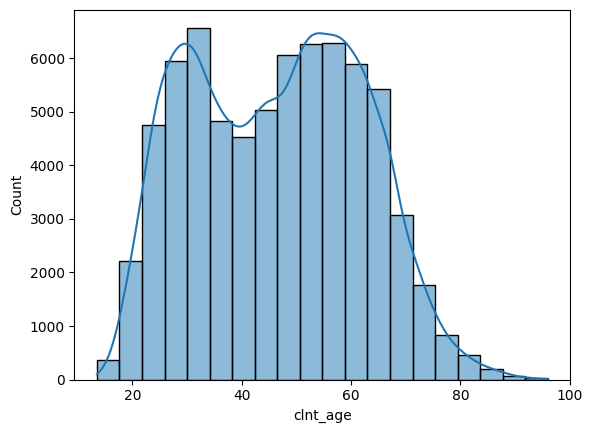

In [11]:
sns.histplot(df_final_demo['clnt_age'], bins = 20, kde =True)

<Axes: xlabel='clnt_age'>

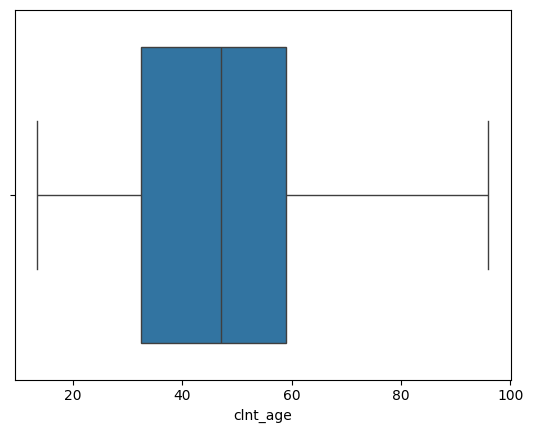

In [12]:
sns.boxplot(x = df_final_demo['clnt_age'])

<Axes: xlabel='gendr', ylabel='count'>

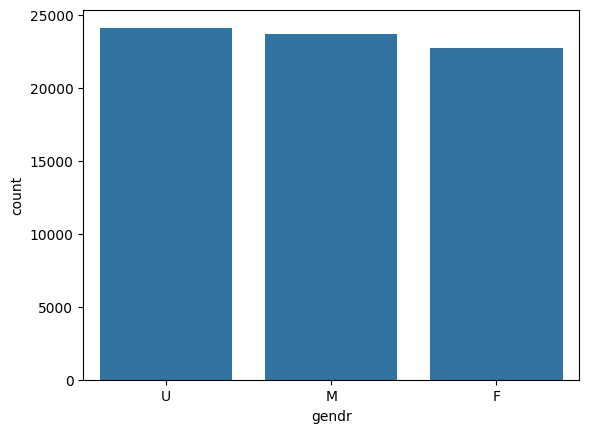

In [13]:
sns.countplot(data=df_final_demo, x='gendr')

In [14]:
gender_percent = df_final_demo['gendr'].value_counts(normalize=True) * 100
print(gender_percent)

gendr
U    34.174292
M    33.606255
F    32.219452
Name: proportion, dtype: float64


<Axes: xlabel='num_accts', ylabel='clnt_tenure_yr'>

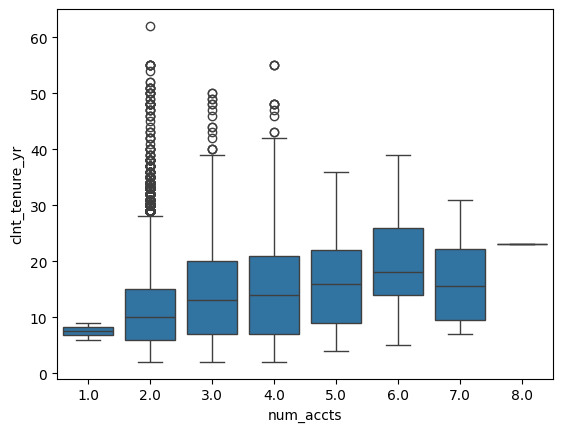

In [15]:
sns.boxplot(data=df_final_demo, x='num_accts', y='clnt_tenure_yr')

<Axes: xlabel='account_type', ylabel='count'>

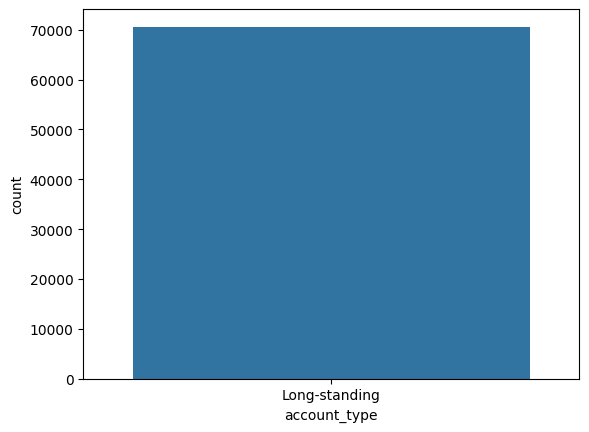

In [16]:
df_final_demo['account_type'] = df_final_demo['clnt_tenure_yr'].apply(lambda x: 'New' if x < 2 else 'Long-standing')
sns.countplot(data=df_final_demo, x='account_type')

<Axes: xlabel='gendr', ylabel='clnt_age'>

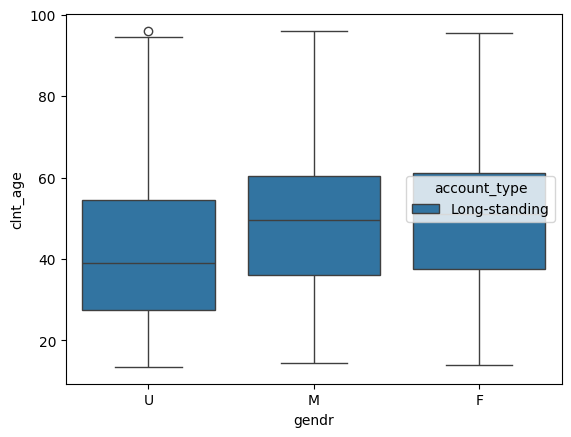

In [17]:
sns.boxplot(data=df_final_demo, x='gendr', y='clnt_age', hue='account_type')

In [ ]:
# Find clients who reached the final confirm step
completion = df_final_web_data.groupby('visit_id')['process_step'].apply(lambda steps: 'confirm' in steps.values)
completion

visit_id
100012776_37918976071_457913     True
1000165_4190026492_760066        True
100019538_17884295066_43909      True
100022086_87870757897_149620     True
100030127_47967100085_936361    False
                                ...  
999986292_55082159911_561557     True
999988789_76411676596_272843    False
999989069_52203656268_170206    False
999991142_15352368745_399725    False
999992932_41666455053_671149     True
Name: process_step, Length: 158095, dtype: bool

In [ ]:
completion_rate = completion.mean() * 100
print(f"Completion Rate: {completion_rate:.2f}%")

Completion Rate: 56.82%


In [29]:
df_final_web_data = df_final_web_data.sort_values(by=['visit_id','date_time'])
df_final_web_data


,client_id,visitor_id,visit_id,process_step,date_time,time_diff,time_diff_sec
108614,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,NaT,NaN
108613,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,0 days 00:00:52,52.0
447951,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,NaT,NaN
447950,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,0 days 00:00:03,3.0
447949,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,0 days 00:00:24,24.0
...,...,...,...,...,...,...,...
539055,7149380,483112224_46340533900,999992932_41666455053_671149,step_1,2017-06-06 15:46:24,0 days 00:00:21,21.0
539054,7149380,483112224_46340533900,999992932_41666455053_671149,step_2,2017-06-06 15:47:32,0 days 00:01:08,68.0
539072,7149380,483112224_46340533900,999992932_41666455053_671149,step_3,2017-06-06 16:01:46,0 days 00:14:14,854.0
539071,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:04:08,0 days 00:02:22,142.0


In [25]:
# Convert to datetime if not already
df_final_web_data['date_time'] = pd.to_datetime(df_final_web_data['date_time'], errors='coerce')

# Sort by visit and timestamp
df_final_web_data = df_final_web_data.sort_values(by=['visit_id','date_time'])
df_final_web_data

# Compute time difference
df_final_web_data['time_diff'] = df_final_web_data.groupby('visit_id')['date_time'].diff()
df_final_web_data['time_diff']

108614               NaT
108613   0 days 00:00:52
447951               NaT
447950   0 days 00:00:03
447949   0 days 00:00:24
               ...      
539055   0 days 00:00:21
539054   0 days 00:01:08
539072   0 days 00:14:14
539071   0 days 00:02:22
539070   0 days 00:01:26
Name: time_diff, Length: 755405, dtype: timedelta64[ns]

In [26]:
print(df_final_web_data[['visit_id','process_step','date_time','time_diff']].head(15))

                            visit_id process_step           date_time  \
108614  100012776_37918976071_457913      confirm 2017-04-26 13:22:17   
108613  100012776_37918976071_457913      confirm 2017-04-26 13:23:09   
447951     1000165_4190026492_760066        start 2017-06-04 01:07:29   
447950     1000165_4190026492_760066       step_1 2017-06-04 01:07:32   
447949     1000165_4190026492_760066       step_2 2017-06-04 01:07:56   
447948     1000165_4190026492_760066       step_3 2017-06-04 01:09:13   
447947     1000165_4190026492_760066      confirm 2017-06-04 01:09:50   
240562   100019538_17884295066_43909        start 2017-04-09 16:20:56   
240561   100019538_17884295066_43909       step_1 2017-04-09 16:21:12   
240560   100019538_17884295066_43909       step_2 2017-04-09 16:21:21   
240559   100019538_17884295066_43909       step_1 2017-04-09 16:21:35   
240558   100019538_17884295066_43909       step_1 2017-04-09 16:21:41   
240557   100019538_17884295066_43909        start 2

In [34]:
df_final_web_data['time_diff_min'] = df_final_web_data['time_diff'].dt.total_seconds()/60
df_final_web_data['time_diff_min']

108614          NaN
108613     0.866667
447951          NaN
447950     0.050000
447949     0.400000
            ...    
539055     0.350000
539054     1.133333
539072    14.233333
539071     2.366667
539070     1.433333
Name: time_diff_min, Length: 755405, dtype: float64

In [ ]:
# average duration users spend on each step
time_per_step = df_final_web_data.groupby('process_step')['time_diff_min'].mean().reset_index()
print(time_per_step)

  process_step  time_diff_min
0      confirm       2.176374
1        start       2.447007
2       step_1       0.658573
3       step_2       0.763398
4       step_3       1.657354


In [57]:
#If a client moves from a later step (e.g. step_3) back to an earlier step (e.g. step_2), count it as an error.

errors_per_visit = (df_final_web_data.groupby('visit_id')['process_step']
                    .apply(lambda steps: sum(steps.iloc[i] < steps.iloc[i-1] for i in range(1, len(steps))))
    .reset_index(name='num_errors')
)

# Average error rate across visits
error_rate = (errors_per_visit['num_errors'] > 0).mean() * 100
print(f"Error Rate: {error_rate:.2f}% of visits had at least one step-back")

Error Rate: 63.66% of visits had at least one step-back


In [42]:
#Drop-off rate → % of visits that stop at each step without reaching "confirm".
dropoffs = df_final_web_data.groupby('visit_id').apply(lambda x: x['process_step'].iloc[-1]).value_counts(normalize=True)*100
print(dropoffs)

confirm    55.618457
start      26.681426
step_1      8.594832
step_3      5.354376
step_2      3.750909
Name: proportion, dtype: float64


/var/folders/zc/ljl3_lqn79125zg278rlpwtr0000gn/T/ipykernel_2213/2649629372.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dropoffs = df_final_web_data.groupby('visit_id').apply(lambda x: x['process_step'].iloc[-1]).value_counts(normalize=True)*100


Insights for the above output:
Overall Completion Rate = 55.6%
More than half of users successfully complete the process.

Biggest Problem = “Start” Screen

Almost 27% of users drop off right after starting.

This could indicate unclear instructions, poor design, or too much friction upfront.

Step-wise Engagement

Step 2 → Step 3 is relatively smooth (low drop-off).

Step 3 → Confirm has a slightly higher drop-off (5.35%), suggesting a mild usability issue.

Optimization Priority

First, fix the start experience.

Then, investigate why users drop off after step 3.

In [51]:
#Redesign Outcome: Comparing Old vs New Design
#how does the new design's performance compare to the old one?
# Merge experiment info
df_merged_exp = df_final_web_data.merge(df_experiment, on='client_id', how='left')
df_merged_exp.head()

# Similarly compute time_per_step and error_rate separately by experiment_group

,client_id,visitor_id,visit_id,process_step,date_time,time_diff,time_diff_sec,time_diff_min,Variation
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,NaT,NaN,NaN,Test
1,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,0 days 00:00:52,0.866667,0.866667,Test
2,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,NaT,NaN,NaN,NaN
3,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,0 days 00:00:03,0.050000,0.050000,NaN
4,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,0 days 00:00:24,0.400000,0.400000,NaN


In [ ]:
# Compute completion rate per group("confirm step completed")
completion_exp = df_merged_exp.groupby(['Variation', 'visit_id'])['process_step'] \
    .apply(lambda steps: 'confirm' in steps.values) \
    .groupby('Variation') \
    .mean()

print(completion_exp)

Variation
Control    0.498493
Test       0.585173
Name: process_step, dtype: float64


In [54]:
# Average time per step per experiment group
time_per_step = df_merged_exp.groupby(['Variation', 'process_step'])['time_diff_min'].mean().reset_index()
print(time_per_step)

  Variation process_step  time_diff_min
0   Control      confirm       2.141015
1   Control        start       2.581386
2   Control       step_1       0.716646
3   Control       step_2       0.644464
4   Control       step_3       1.549071
5      Test      confirm       2.152929
6      Test        start       2.482381
7      Test       step_1       0.628170
8      Test       step_2       0.802194
9      Test       step_3       1.614183


In [59]:
# Map steps to numbers for easier calculation
step_map = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_merged_exp['step_num'] = df_merged_exp['process_step'].map(step_map)

# Function to count backwards steps
def count_backwards(steps):
    return (steps.diff() < 0).sum()

# Compute error rate per visit
errors_per_visit = df_merged_exp.groupby(['Variation', 'visit_id'])['step_num'].apply(count_backwards)

# Compute % of visits with at least one backward step
error_rate = errors_per_visit.groupby('Variation').apply(lambda x: (x > 0).mean()).reset_index(name='error_rate')
print(error_rate)

  Variation  error_rate
0   Control    0.204449
1      Test    0.269523


Insights of above output:
Control group: ~20.4% of visits had at least one step-back

Test group: ~26.9% of visits had at least one step-back

So the Test (new design) has a higher error rate, suggesting that users in the new design went backward more often, possibly indicating confusion at some steps.

In [60]:
# Compute average time per step by Variation
time_per_step_group = (
    df_merged_exp.groupby(['Variation', 'process_step'])['time_diff_sec']
    .mean()
    .reset_index(name='avg_time_sec')
)

# Optionally convert to minutes
time_per_step_group['avg_time_min'] = time_per_step_group['avg_time_sec'] / 60

print(time_per_step_group)

  Variation process_step  avg_time_sec  avg_time_min
0   Control      confirm      2.141015      0.035684
1   Control        start      2.581386      0.043023
2   Control       step_1      0.716646      0.011944
3   Control       step_2      0.644464      0.010741
4   Control       step_3      1.549071      0.025818
5      Test      confirm      2.152929      0.035882
6      Test        start      2.482381      0.041373
7      Test       step_1      0.628170      0.010469
8      Test       step_2      0.802194      0.013370
9      Test       step_3      1.614183      0.026903
